In [0]:
# a = []
# while(1):
#   a.append("Abcde")

In [1]:
from google.colab import drive
drive.mount('drive')
# %cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [0]:
while(1):
  pass

# Imports

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import cv2
from PIL import Image

In [3]:
!unzip drive/'My Drive'/MSDS_DL/assignment_5/dataset/assignment_5_dataset.zip -d assignment_5_dataset

Streaming output truncated to the last 5000 lines.
  inflating: assignment_5_dataset/Assignment 5 Dataset/train/normal/7ec0b033-9133-4f8c-abd0-ea246aa21dfa.png  
  inflating: assignment_5_dataset/Assignment 5 Dataset/train/normal/7ec4666c-0304-4b7b-8263-bf417ab7cccd.png  
  inflating: assignment_5_dataset/Assignment 5 Dataset/train/normal/7ee9ace4-3059-49c4-9356-705203289e46.png  
  inflating: assignment_5_dataset/Assignment 5 Dataset/train/normal/7ef283b8-9c5a-4ada-a575-f68289e338ae.png  
  inflating: assignment_5_dataset/Assignment 5 Dataset/train/normal/7ef98cac-f239-406e-af10-67aead1e038f.png  
  inflating: assignment_5_dataset/Assignment 5 Dataset/train/normal/7efb172c-23b7-4d57-bd57-bd461b9e7ca7.png  
  inflating: assignment_5_dataset/Assignment 5 Dataset/train/normal/7f015127-0907-4ba7-8021-cf868a210d4c.png  
  inflating: assignment_5_dataset/Assignment 5 Dataset/train/normal/7f05b70f-2ad0-4db6-9e05-6c2baec8cd52.png  
  inflating: assignment_5_dataset/Assignment 5 Dataset/train/

In [0]:
parent_dir = "drive/My Drive/MSDS_DL/assignment_5/"
data_dir = "assignment_5_dataset/Assignment 5 Dataset/"
weights_dir = parent_dir + "weights/"
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Find Mean and std of train,valid and test

In [0]:
train_infected_files = os.listdir(data_dir+'train/infected')

In [0]:
img = Image.open( data_dir+'train/infected/'+train_infected_files[0])

In [0]:
len(train_infected)

4811

In [0]:
train_infected_files = os.listdir(data_dir+'train/infected')
train_infected = []
for f in train_infected_files:
  if f.endswith('.png'):
    img = Image.open(data_dir+'train/infected/'+f)
    img = img.resize(size=(256,256), resample=Image.LANCZOS)
    img = np.array(img)
    train_infected.append(img)

train_normal_files = os.listdir(data_dir+'train/normal')
train_normal = []
for f in train_normal_files:
  if f.endswith('.png'):
    img = Image.open(data_dir+'train/normal/'+f)
    img = img.resize(size=(256,256), resample=Image.LANCZOS)
    img = np.array(img)
    train_normal.append(img)

In [0]:
validation_infected = []
validation_infected_files = os.listdir(data_dir+'validation/infected')
for f in validation_infected_files:
  if f.endswith('.png'):
    img = Image.open(data_dir+'validation/infected/'+f)
    img = img.resize(size=(256,256), resample=Image.LANCZOS)
    img = np.array(img)
    validation_infected.append(img)

validation_normal_files = os.listdir(data_dir+'validation/normal')
validation_normal = []
for f in validation_normal_files:
  if f.endswith('.png'):
    img = Image.open(data_dir+'validation/normal/'+f)
    img = img.resize(size=(256,256), resample=Image.LANCZOS)
    img = np.array(img)
    validation_normal.append(img)

In [0]:
test_infected = []
test_infected_files = os.listdir(data_dir+'test/infected')
for f in test_infected_files:
  if f.endswith('.png'):
    img = Image.open(data_dir+'test/infected/'+f)
    img = img.resize(size=(256,256), resample=Image.LANCZOS)
    img = np.array(img)
    test_infected.append(img)

test_normal_files = os.listdir(data_dir+'test/normal')
test_normal = []
for f in test_normal_files:
  if f.endswith('.png'):
    img = Image.open(data_dir+'test/normal/'+f)
    img = img.resize(size=(256,256), resample=Image.LANCZOS)
    img = np.array(img)
    test_normal.append(img)

In [0]:
print(len(test_normal))
len(test_infected)

885


615

In [0]:
train_infected.extend(train_normal)
train_infected.extend(validation_normal)
test_infected.extend(test_normal)

In [0]:
count = 1
for i,img in enumerate(train_infected):
  if img.ndim >2:
    print(f"{count}: {i} image has {img.ndim} and shape {img.shape}")
    count +=1
    train_infected[i] = img[:,:,0]

In [0]:
train_set = np.array(train_infected)
test_set = np.array(test_infected)


In [0]:
train_set.shape

(11892, 256, 256)

In [0]:
train_mean = np.mean(train_set)
train_std = np.std(train_set)
print(f"Train mean {train_mean} train_std {train_std}")

test_mean = np.mean(test_set)
test_std = np.std(test_set)
print(f"test mean {test_mean} test_std {test_std}")

Train mean 125.77869559280437 train_std 63.988830983601126
test mean 124.41242999510695 test_std 63.8298422368448


In [0]:
print(f"Train mean {train_mean/255} train_std {train_std/255}")
print(f"test mean {test_mean/255} test_std {test_std/255}")

Train mean 0.4932497866384485 train_std 0.2509365920925534
test mean 0.48789188233375275 test_std 0.2503131068111561


# Input Pipeline

## Transforms

In [0]:
train_transform = transforms.Compose(
                        [transforms.Resize(size = (256,256), interpolation=Image.LANCZOS),
                        transforms.RandomHorizontalFlip(),
                        transforms.RandomRotation(30),
                        # transforms.RandomResizedCrop(224),
                        transforms.ToTensor(),
                        transforms.Normalize([0.4932], [0.251])])


test_transform = transforms.Compose(
                        [transforms.Resize(size = (256,256), interpolation=Image.LANCZOS),
                        transforms.RandomHorizontalFlip(),
                        transforms.RandomRotation(30),
                        # transforms.RandomResizedCrop(224),
                        transforms.ToTensor(),
                        transforms.Normalize([0.488], [0.2503])])

## Load Data

In [11]:
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transform)
valid_data = datasets.ImageFolder(data_dir + '/validation', transform=train_transform)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transform)


trainloader = torch.utils.data.DataLoader(train_data, batch_size=120, shuffle=True,num_workers=4)
# trainloader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
validloader = torch.utils.data.DataLoader(valid_data, batch_size=150, shuffle=True,num_workers=4)
# validloader = torch.utils.data.DataLoader(valid_data, batch_size=32, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=150, shuffle=True,num_workers=4)
# testloader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=True)

print("Classes: ")
class_names = train_data.classes
print(class_names)

Classes: 
['infected', 'normal']


# Load Models

In [0]:
vgg16 = models.vgg16(pretrained=True)
print(vgg16)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth



VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=

In [0]:
resnet18 = models.resnet18(pretrained=True)
print(resnet18)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth



ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
 

#Train,evaluate,accuracy,f1_score and confusion matrix functions 

In [0]:
from sklearn.metrics import f1_score,accuracy_score
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(confusion,classes=None, title='Confusion matrix', cmap=plt.cm.gray_r):
    ##X-axis is predicted and y_asix is true
    import seaborn as sn
    import pandas as pd
    import matplotlib.pyplot as plt
    if classes is not None:
      df_cm = pd.DataFrame(confusion, classes, classes)
    else :
      df_cm = pd.DataFrame(confusion, range(len(confusion)), range(len(confusion)))
    # plt.figure(figsize=(10,7))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
    plt.title("Confusion Matrix")

    plt.savefig("confusion_matrix")
    plt.show()

# C = confusion_matrix(testY.squeeze(),test_pred.squeeze())
classes = ['infected', 'normal']
# score = f1_score(labels,preds)
# acc = accuracy_score(labels,preds)
# print(score)
# print(acc)

In [0]:
def evaluate(model,loss_function,data_loader,device):
  model.eval()
  loss = 0
  accuracy = 0
  correct = 0
  total = 0
  with torch.no_grad():
    for i,data in enumerate(data_loader):
      inputs,labels = data
      inputs,labels = inputs.to(device),labels.to(device)
      outputs = model(inputs)
      loss += loss_function(outputs,labels)
      _, predicted = torch.max(outputs.data, 1)
      # _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
      # loss += l
      accuracy += correct / total
  return loss/len(data_loader),accuracy/len(data_loader)

def accuracy(model,inputs,labels):
  model.eval()
  accuracy = 0
  correct = 0
  total = 0
  with torch.no_grad():
    inputs,labels = inputs.to(device),labels.to(device)
    outputs = model(inputs)
    # predicted = torch.argmax(outputs.data, 1)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
      # loss += l
  accuracy = correct / total
  return accuracy

def predict(model,data_loader,device):
  model.to(device)
  model.eval()
  num_elements = len(data_loader.dataset)
  predictions = torch.zeros(num_elements)
  all_labels = torch.zeros(num_elements)
  num_batches = len(data_loader)
  batch_size = data_loader.batch_size

  with torch.no_grad():
    for i,data in enumerate(data_loader):
      start = i*batch_size
      end = start + batch_size
      if i == num_batches - 1:
          end = num_elements

      inputs,labels = data
      inputs,labels = inputs.to(device),labels.to(device)
      outputs = model(inputs)
      _, pred = torch.max(outputs.data, 1)
      # _, predicted = torch.max(outputs.data, 1)
      predictions[start:end] = pred
      all_labels[start:end] = labels
  return all_labels.cpu().data.numpy(),predictions.cpu().data.numpy()


def predict_prob(model,data_loader,device):
  model.to(device)
  model.eval()
  softmax = nn.Sequential(nn.Softmax(dim=1))
  softmax.to(device)
  softmax.eval()

  num_elements = len(data_loader.dataset)
  predictions = torch.zeros(num_elements)
  all_labels = torch.zeros(num_elements)
  num_batches = len(data_loader)
  batch_size = data_loader.batch_size

  with torch.no_grad():
    for i,data in enumerate(data_loader):
      start = i*batch_size
      end = start + batch_size
      if i == num_batches - 1:
          end = num_elements

      inputs,labels = data
      inputs,labels = inputs.to(device),labels.to(device)
      outputs = model(inputs)
      outputs = softmax(outputs)

      # print(f"size of output is {outputs.size}")

      prob, _ = torch.max(outputs.data, 1)
      # _, predicted = torch.max(outputs.data, 1)
      predictions[start:end] = prob
      all_labels[start:end] = labels
  return all_labels.cpu().data.numpy(),predictions.cpu().data.numpy()

def get_best(labels,prob,data_loader,n=2):
    prob_diff = labels - prob
    sorted_prob = prob_diff.argsort() #min to max
    best_infected_idx = sorted_prob[:n]+1
    batch_size = data_loader.batch_size
    # print(f'best_infected_idx len {len(best_infected_idx)}')
    # print(f"Values of best_infected_idx is {best_infected_idx}")
    # infected_idx = []
    # for i in range()

    normal_idx = []
    for i in range(len(labels)):
      idx = sorted_prob[i]
      if prob_diff[idx] >= 0:
        normal_idx.append(idx)

    best_normal_idx = np.array(normal_idx[:n])+1

    # print(f'best_normal_idx len {len(best_normal_idx)}')
    # print(f"Values of best_normal_idx is {best_normal_idx}")

    best_infected_batch_idx = best_infected_idx // batch_size
    best_infected_batch_idx[best_infected_batch_idx==0] = 1

    best_infected_idx_in_batch = best_infected_idx % batch_size

    # print(f"Batch numbers of best infected are {best_infected_batch_idx}")
    # print(f"index number of best infected are {best_infected_idx_in_batch}")

    best_normal_batch_idx = best_normal_idx // batch_size
    best_normal_batch_idx[best_normal_batch_idx==0] = 1
    best_normal_idx_in_batch = best_normal_idx % batch_size

    # print(f"Batch numbers of best normal are {best_normal_batch_idx}")
    # print(f"index number of best normal are {best_normal_idx_in_batch}")
    

    best_normal_imgs = []
    best_infected_imgs = []
    # print("Inside best normal")
    for i,normal_batch in enumerate(best_normal_batch_idx):
      for batch_num,data in enumerate(data_loader):

        # print(batch_num)

        if normal_batch == (batch_num+1):

          # print("Common Batch number is found!")
          
          imgs_tensors,_ = data

          # print(f"Size of normal batch tensor images is {imgs_tensors.size()}")

          imgs = imgs_tensors.data.numpy()

          # print(f"Shape of normal batch images is {imgs.shape}")
          
          img = imgs[best_normal_idx_in_batch[i]]
          best_normal_imgs.append(img)
          break


    for i,infected_batch in enumerate(best_infected_batch_idx):
      for batch_num,data in enumerate(data_loader):
        if normal_batch == (batch_num+1):
          imgs_tensors,_ = data
          imgs = imgs_tensors.data.numpy()
          img = imgs[best_infected_idx_in_batch[i]]
          best_infected_imgs.append(img)
          break
      

    return best_normal_imgs,best_infected_imgs

def get_worst(labels,prob,data_loader,n=2):
    prob_diff = labels - prob
    sorted_prob = prob_diff.argsort() #min to max

    worst_normal_idx = sorted_prob[-n:][::-1]+1
    batch_size = data_loader.batch_size
    
    infected_idx = []
    for i in range(len(labels)):
      idx = sorted_prob[i]
      if prob_diff[idx] < 0:
        infected_idx.append(idx)
    worst_infected_idx = np.array(infected_idx[-n:][::-1])

    worst_infected_batch_idx = worst_infected_idx // batch_size
    worst_infected_batch_idx[worst_infected_batch_idx==0] = 1

    worst_infected_idx_in_batch = worst_infected_idx % batch_size

    worst_normal_batch_idx = worst_normal_idx // batch_size
    worst_normal_batch_idx[worst_normal_batch_idx==0] = 1

    worst_normal_idx_in_batch = worst_normal_idx % batch_size

    worst_normal_imgs = []
    worst_infected_imgs = []

    for i,normal_batch in enumerate(worst_normal_batch_idx):
      for batch_num,data in enumerate(data_loader):
        if normal_batch == (batch_num+1):
          imgs_tensors,_ = data
          imgs = imgs_tensors.data.numpy()
          img = imgs[worst_normal_idx_in_batch[i]]
          worst_normal_imgs.append(img)
          break

    for i,infected_batch in enumerate(worst_infected_batch_idx):
      for batch_num,data in enumerate(data_loader):
        if normal_batch == (batch_num+1):
          imgs_tensors,_ = data
          imgs = imgs_tensors.data.numpy()
          img = imgs[worst_infected_idx_in_batch[i]]
          worst_infected_imgs.append(img)
          break

    return worst_normal_imgs,worst_infected_imgs

In [0]:
def train(model,train_loader,opt,loss_function,epochs,valid_loader=None, weight_save_path = None,batch_info=True,dot_after_batch=5,asterik_after_batch=20):
  # from tqdm import tqdm
  import time
  #if you have gpu then you need to convert the network and data to cuda
  #the easiest way is to first check for device and then convert network and data to device
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  # print(de)
  model.to(device)

  epoch_loss_list = []
  epoch_accuracy_list = []
  valid_loss_list = []
  valid_accuracy_list = []

  for epoch in range(epochs):  # loop over the dataset multiple times
      tic = time.time()
      model.train()
      running_loss = 0.0
      running_accuracy = 0.0
      # pbar = tqdm(enumerate(train_loader))
      # for i, data in pbar:
      for i, data in enumerate(train_loader):
          # get the inputs
          inputs, labels = data
          inputs, labels = inputs.to(device), labels.to(device)

          # zero the parameter gradients
          opt.zero_grad()
          # In PyTorch, we need to set the gradients to zero before starting to do backpropragation 
          # because PyTorch accumulates the gradients on subsequent backward passes. 
          # This is convenient while training RNNs. 
          # So, the default action is to accumulate the gradients on every loss.backward() call

          # forward + backward + optimize
          outputs = model(inputs)               #----> forward pass
          loss = loss_function(outputs, labels)   #----> compute loss
          loss.backward()                     #----> backward pass
          opt.step()                    #----> weights update

          # print statistics
          running_loss += loss.item()
          _,predicted = torch.max(outputs.data,1)
          total = labels.size(0)
          correct = (predicted == labels).sum().item()
          running_accuracy += correct / total

          # pbar.set_description(f"Train Epoch: {epoch} [{i * len(inputs)}/{len(train_loader.dataset)}\
          #                     {100. * i / len(train_loader):.0f}%)]\tLoss: {loss.item():.4f}\taccuracy:{correct/total:.3f}")
          if batch_info:
            if (i+1) % asterik_after_batch == 0:
              print("*",end=' ')
            elif (i+1) % dot_after_batch == 0:
              print(".",end=' ')
      print()
      epoch_loss_list.append(running_loss / len(train_loader))
      epoch_accuracy_list.append(running_accuracy/len(train_loader))

      if valid_loader is not None:
        valid_loss,valid_acc = evaluate(model,loss_function,valid_loader,device)
        valid_loss_list.append(valid_loss)
        valid_accuracy_list.append(valid_acc)
        toc = time.time()
        print(f"Epoch: {epoch} train_loss:{running_loss / len(train_loader):.4f}   train_acc:{running_accuracy/len(train_loader):.3f}   valid_loss:{valid_loss:.4f}   valid_acc:{valid_acc:.3f} time-taken:{(toc-tic)/60:.3f}m")
      else:

        print(f"Epoch: {epoch} train_loss:{running_loss / len(train_loader):.4f}   train_acc:{running_accuracy/len(train_loader):.3f}")
      if weight_save_path is not None:
        torch.save(model.state_dict(), weight_save_path)

  print('Finished Training')
  if valid_loader is not None:
    return epoch_loss_list,epoch_accuracy_list,valid_loss_list,valid_accuracy_list
  else:
    return epoch_loss_list,epoch_accuracy_list

# Task-1

### Freezing the layers

In [0]:
# Freeze training for all layers
for param in vgg16.features.parameters():
    param.requires_grad = False

In [0]:
for i,child in enumerate(resnet18.children()):
  for param in child.parameters():
    param.requires_grad = False

## Define new layers

In [0]:
## roll no is msds19009 so first 190
vgg16_classifier = nn.Sequential(nn.Linear(25088,190),
                            nn.ReLU(),
                            nn.Dropout(p=0.5),
                            nn.Linear(190,2),
                            )

resnet18_fc = nn.Sequential(nn.Linear(512,190),
                            nn.ReLU(),
                            nn.Dropout(p=0.5),
                            nn.Linear(190,2),
                            )
vgg16.classifier = vgg16_classifier
resnet18.fc = resnet18_fc

## Define epochs,loss and optimizer

In [0]:
# Epochs = 10
criterion = nn.CrossEntropyLoss()
vgg_optimizer = optim.SGD(vgg16.parameters(), lr=0.001, momentum=0.9)
resnet_optimizer = optim.SGD(resnet18.parameters(), lr=0.001, momentum=0.9)

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

## Train VGG16

In [0]:
t1_vgg_train_loss, t1_vgg_train_acc, t1_vgg_valid_loss, t1_vgg_valid_acc = train(vgg16,trainloader,vgg_optimizer,criterion,9,validloader,weights_dir+"vgg16_FC_Only.pth",
                                                  batch_info=False,dot_after_batch=5,asterik_after_batch=10)


Epoch: 0 train_loss:0.3138   train_acc:0.874   valid_loss:0.3566   valid_acc:0.8407671957671958 time-taken:2.826m

Epoch: 1 train_loss:0.3197   train_acc:0.871   valid_loss:0.3578   valid_acc:0.851442932728647 time-taken:2.831m

Epoch: 2 train_loss:0.3131   train_acc:0.868   valid_loss:0.3446   valid_acc:0.8624792139077855 time-taken:2.860m

Epoch: 3 train_loss:0.3088   train_acc:0.875   valid_loss:0.3553   valid_acc:0.8358760393046106 time-taken:2.858m

Epoch: 4 train_loss:0.3094   train_acc:0.875   valid_loss:0.3417   valid_acc:0.8341413454270596 time-taken:2.868m

Epoch: 5 train_loss:0.3111   train_acc:0.875   valid_loss:0.3375   valid_acc:0.8560219198790628 time-taken:2.859m

Epoch: 6 train_loss:0.3055   train_acc:0.874   valid_loss:0.3426   valid_acc:0.8640204081632653 time-taken:2.863m

Epoch: 7 train_loss:0.3073   train_acc:0.875   valid_loss:0.3470   valid_acc:0.8691383219954649 time-taken:2.845m

Epoch: 8 train_loss:0.3020   train_acc:0.877   valid_loss:0.3550   valid_acc:0.8

In [0]:
print(t1_vgg_train_loss, t1_vgg_train_acc, t1_vgg_valid_loss, t1_vgg_valid_acc)

[0.3138052238070447, 0.3197203561447669, 0.31314868188422657, 0.3088495990504389, 0.3093753629836483, 0.31108407956966455, 0.3055300215880076, 0.3072796345188998, 0.3020330522803293] [0.87351966873706, 0.8710766045548654, 0.8684057971014492, 0.8749482401656316, 0.874865424430642, 0.8754658385093166, 0.8737474120082815, 0.874575569358178, 0.8771221532091097] [tensor(0.3566, device='cuda:0'), tensor(0.3578, device='cuda:0'), tensor(0.3446, device='cuda:0'), tensor(0.3553, device='cuda:0'), tensor(0.3417, device='cuda:0'), tensor(0.3375, device='cuda:0'), tensor(0.3426, device='cuda:0'), tensor(0.3470, device='cuda:0'), tensor(0.3550, device='cuda:0')] [0.8407671957671958, 0.851442932728647, 0.8624792139077855, 0.8358760393046106, 0.8341413454270596, 0.8560219198790628, 0.8640204081632653, 0.8691383219954649, 0.8306848072562358]


### plot confusion matrix

0.897
0.9171248491350409


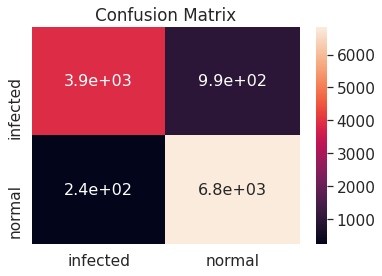

In [0]:
## VGG - Train confusion Matrix
vgg_train_t1_labels,vgg_train_t1_preds = predict(vgg16,trainloader,device)
vgg_train_t1_acc = accuracy_score(vgg_train_t1_labels,vgg_train_t1_preds)
print(vgg_train_t1_acc)
vgg_train_t1_f1 = f1_score(vgg_train_t1_labels,vgg_train_t1_preds)
print(vgg_train_t1_f1)
vgg_train_t1_C = confusion_matrix(vgg_train_t1_labels,vgg_train_t1_preds)
plot_confusion_matrix(vgg_train_t1_C,classes=classes)

0.8673333333333333
0.8932975871313673


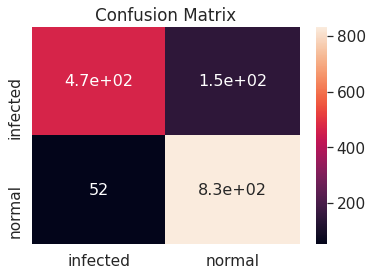

In [0]:
## VGG - valid confusion Matrix
vgg_valid_t1_labels,vgg_valid_t1_preds = predict(vgg16,validloader,device)
vgg_valid_t1_acc = accuracy_score(vgg_valid_t1_labels,vgg_valid_t1_preds)
print(vgg_valid_t1_acc)
vgg_valid_t1_f1 = f1_score(vgg_valid_t1_labels,vgg_valid_t1_preds)
print(vgg_valid_t1_f1)
vgg_valid_t1_C = confusion_matrix(vgg_valid_t1_labels,vgg_valid_t1_preds)
plot_confusion_matrix(vgg_valid_t1_C,classes=classes)

0.9233333333333333
0.9378714208535928


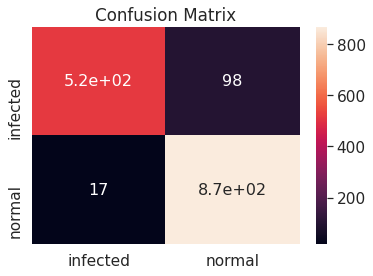

In [0]:
## VGG - test confusion Matrix
vgg_test_t1_labels,vgg_test_t1_preds = predict(vgg16,testloader,device)
vgg_test_t1_acc = accuracy_score(vgg_test_t1_labels,vgg_test_t1_preds)
print(vgg_test_t1_acc)
vgg_test_t1_f1 = f1_score(vgg_test_t1_labels,vgg_test_t1_preds)
print(vgg_test_t1_f1)
vgg_test_t1_C = confusion_matrix(vgg_test_t1_labels,vgg_test_t1_preds)
plot_confusion_matrix(vgg_test_t1_C,classes=classes)

## Train Resnet18

In [0]:
t1_res_train_loss, t1_res_train_acc, t1_res_valid_loss, t1_res_valid_acc = train(resnet18,trainloader,resnet_optimizer,criterion,20,validloader,
                                                                                 weights_dir+"res18_FC_Only.pth",batch_info=False,dot_after_batch=5,
                                                                                 asterik_after_batch=10)


Epoch: 0 train_loss:0.6020   train_acc:0.687   valid_loss:0.5275   valid_acc:0.799 time-taken:2.417m

Epoch: 1 train_loss:0.4808   train_acc:0.797   valid_loss:0.4560   valid_acc:0.800 time-taken:2.406m

Epoch: 2 train_loss:0.4259   train_acc:0.818   valid_loss:0.4263   valid_acc:0.806 time-taken:2.396m

Epoch: 3 train_loss:0.3991   train_acc:0.831   valid_loss:0.4126   valid_acc:0.823 time-taken:2.426m

Epoch: 4 train_loss:0.3841   train_acc:0.838   valid_loss:0.3936   valid_acc:0.839 time-taken:2.417m

Epoch: 5 train_loss:0.3749   train_acc:0.841   valid_loss:0.3935   valid_acc:0.842 time-taken:2.439m

Epoch: 6 train_loss:0.3735   train_acc:0.842   valid_loss:0.3780   valid_acc:0.836 time-taken:2.426m

Epoch: 7 train_loss:0.3589   train_acc:0.852   valid_loss:0.3865   valid_acc:0.825 time-taken:2.452m

Epoch: 8 train_loss:0.3565   train_acc:0.855   valid_loss:0.3729   valid_acc:0.830 time-taken:2.416m

Epoch: 9 train_loss:0.3488   train_acc:0.854   valid_loss:0.3714   valid_acc:0.85

In [0]:
print(t1_res_train_loss, t1_res_train_acc, t1_res_valid_loss, t1_res_valid_acc)

[0.6019949671150981, 0.48084321142970654, 0.4259111544360285, 0.39905301297920337, 0.3840992083584053, 0.3749004775199337, 0.3735443038353022, 0.35887504660564923, 0.35649186804674676, 0.3487515864164933, 0.35206027220988617, 0.34669934234757355, 0.3420629103978475, 0.34109104176362354, 0.3376131891340449, 0.33501249465389527, 0.33043964056001196, 0.3283392467360566, 0.3312768685644951, 0.3247528343960859] [0.6869151138716356, 0.7973498964803312, 0.8178467908902693, 0.8312215320910973, 0.8383436853002069, 0.8412422360248449, 0.8419047619047623, 0.8518219461697726, 0.8551552795031054, 0.8544099378881989, 0.8569979296066254, 0.8588198757763974, 0.8599585921325056, 0.8614492753623189, 0.8608695652173914, 0.8638509316770188, 0.8661904761904761, 0.866086956521739, 0.8675569358178054, 0.867370600414079] [tensor(0.5275, device='cuda:0'), tensor(0.4560, device='cuda:0'), tensor(0.4263, device='cuda:0'), tensor(0.4126, device='cuda:0'), tensor(0.3936, device='cuda:0'), tensor(0.3935, device='cu

### Plot loss and accuracy curves

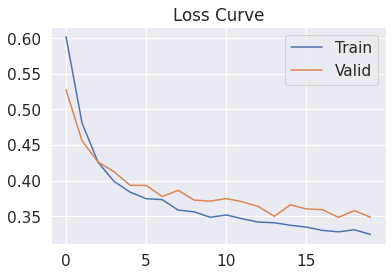

In [0]:
plt.plot(t1_res_train_loss,label = 'Train')
plt.plot(t1_res_valid_loss,label = 'Valid')
plt.xlim([0,21])
plt.ylim([0,1])
plt.title("Loss Curve")
plt.legend()
plt.show()

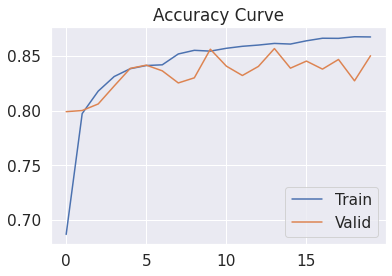

In [0]:
plt.plot(t1_res_train_acc,label = 'Train')
plt.plot(t1_res_valid_acc,label = 'Valid')
plt.xlim([0,21])
plt.ylim([0,1])
plt.title("Accuracy Curve")
plt.legend()
plt.show()

### plot confusion matrix

0.8756666666666667
0.895984383714445


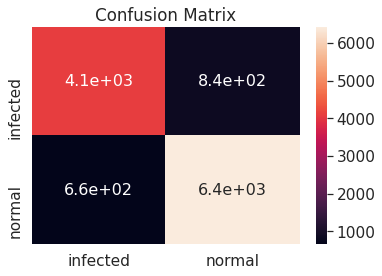

In [0]:
## resnet - Train confusion Matrix
resnet_train_t1_labels,resnet_train_t1_preds = predict(resnet18,trainloader,device)
resnet_train_t1_acc = accuracy_score(resnet_train_t1_labels,resnet_train_t1_preds)
print(resnet_train_t1_acc)
resnet_train_t1_f1 = f1_score(resnet_train_t1_labels,resnet_train_t1_preds)
print(resnet_train_t1_f1)
resnet_train_t1_C = confusion_matrix(resnet_train_t1_labels,resnet_train_t1_preds)
plot_confusion_matrix(resnet_train_t1_C,classes=classes)

0.8473333333333334
0.8722810931399888


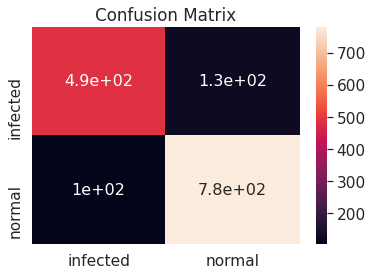

In [0]:
## resnet - valid confusion Matrix
resnet_valid_t1_labels,resnet_valid_t1_preds = predict(resnet18,validloader,device)
resnet_valid_t1_acc = accuracy_score(resnet_valid_t1_labels,resnet_valid_t1_preds)
print(resnet_valid_t1_acc)
resnet_valid_t1_f1 = f1_score(resnet_valid_t1_labels,resnet_valid_t1_preds)
print(resnet_valid_t1_f1)
resnet_valid_t1_C = confusion_matrix(resnet_valid_t1_labels,resnet_valid_t1_preds)
plot_confusion_matrix(resnet_valid_t1_C,classes=classes)

0.916
0.9299999999999999


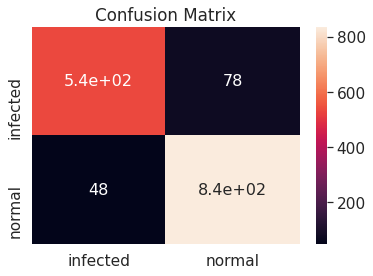

In [0]:
## resnet - test confusion Matrix
resnet_test_t1_labels,resnet_test_t1_preds = predict(resnet18,testloader,device)
resnet_test_t1_acc = accuracy_score(resnet_test_t1_labels,resnet_test_t1_preds)
print(resnet_test_t1_acc)
resnet_test_t1_f1 = f1_score(resnet_test_t1_labels,resnet_test_t1_preds)
print(resnet_test_t1_f1)
resnet_test_t1_C = confusion_matrix(resnet_test_t1_labels,resnet_test_t1_preds)
plot_confusion_matrix(resnet_test_t1_C,classes=classes)

## Best and Worst Predictionns

In [0]:
vgg16 = models.vgg16(pretrained=True)
resnet18 = models.resnet18(pretrained=True)

In [0]:
vgg16_classifier = nn.Sequential(nn.Linear(25088,190),
                            nn.ReLU(),
                            nn.Dropout(p=0.5),
                            nn.Linear(190,2),
                            )

resnet18_fc = nn.Sequential(nn.Linear(512,190),
                            nn.ReLU(),
                            nn.Dropout(p=0.5),
                            nn.Linear(190,2),
                            )
vgg16.classifier = vgg16_classifier
resnet18.fc = resnet18_fc

In [152]:
vgg16.load_state_dict(torch.load(weights_dir+"vgg16_FC_Only.pth"))
resnet18.load_state_dict(torch.load(weights_dir+"res18_FC_Only.pth"))

<All keys matched successfully>

### VGG

In [0]:
t2_test_labels,t2_test_probs = predict_prob(vgg16,testloader,device)

In [0]:
t2_best_normal,t2_best_infected = get_best(t2_test_labels,t2_test_probs,testloader)
t2_worst_normal,t2_worst_infected = get_worst(t2_test_labels,t2_test_probs,testloader)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


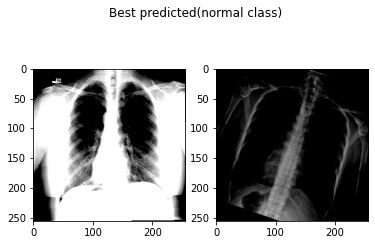

In [155]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(np.moveaxis(t2_best_normal[0],0,-1))

ax2 = fig.add_subplot(122)
ax2.imshow(np.moveaxis(t2_best_normal[1],0,-1))
fig.suptitle("Best predicted(normal class)")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


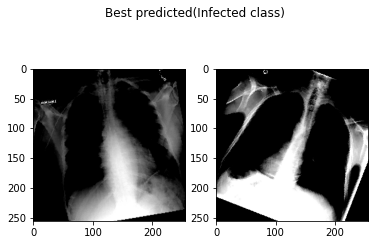

In [156]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(np.moveaxis(t2_best_infected[0],0,-1))

ax2 = fig.add_subplot(122)
ax2.imshow(np.moveaxis(t2_best_infected[1],0,-1))
fig.suptitle("Best predicted(Infected class)")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


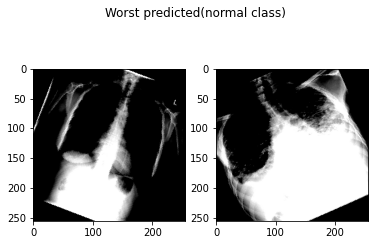

In [157]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(np.moveaxis(t2_worst_normal[0],0,-1))

ax2 = fig.add_subplot(122)
ax2.imshow(np.moveaxis(t2_worst_normal[1],0,-1))
fig.suptitle("Worst predicted(normal class)")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


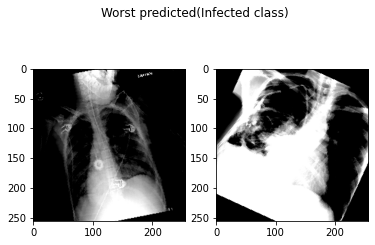

In [158]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(np.moveaxis(t2_worst_infected[0],0,-1))

ax2 = fig.add_subplot(122)
ax2.imshow(np.moveaxis(t2_worst_infected[1],0,-1))
fig.suptitle("Worst predicted(Infected class)")
plt.show()

### ResNet

In [0]:
t2_test_labels,t2_test_probs = predict_prob(resnet18,testloader,device)

In [0]:
t2_best_normal,t2_best_infected = get_best(t2_test_labels,t2_test_probs,testloader)
t2_worst_normal,t2_worst_infected = get_worst(t2_test_labels,t2_test_probs,testloader)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


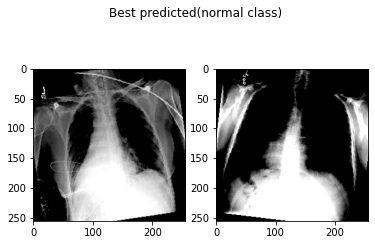

In [161]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(np.moveaxis(t2_best_normal[0],0,-1))

ax2 = fig.add_subplot(122)
ax2.imshow(np.moveaxis(t2_best_normal[1],0,-1))
fig.suptitle("Best predicted(normal class)")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


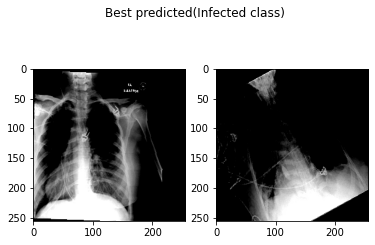

In [162]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(np.moveaxis(t2_best_infected[0],0,-1))

ax2 = fig.add_subplot(122)
ax2.imshow(np.moveaxis(t2_best_infected[1],0,-1))
fig.suptitle("Best predicted(Infected class)")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


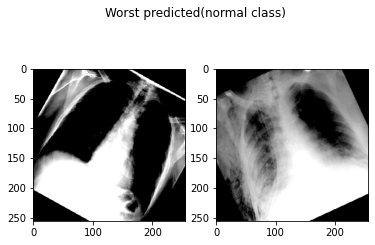

In [163]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(np.moveaxis(t2_worst_normal[0],0,-1))

ax2 = fig.add_subplot(122)
ax2.imshow(np.moveaxis(t2_worst_normal[1],0,-1))
fig.suptitle("Worst predicted(normal class)")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


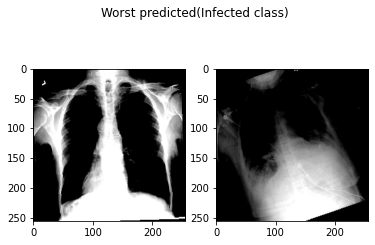

In [164]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(np.moveaxis(t2_worst_infected[0],0,-1))

ax2 = fig.add_subplot(122)
ax2.imshow(np.moveaxis(t2_worst_infected[1],0,-1))
fig.suptitle("Worst predicted(Infected class)")
plt.show()

# Task-2

# Exp#1 Freeze last conv-layer

In [0]:
vgg16_freeze_last_conv = models.vgg16(pretrained=True)
resnet18_freeze_last_conv = models.resnet18(pretrained=True)

In [0]:
# Freeze training for all layers
for param in vgg16_freeze_last_conv.features.parameters():
    param.requires_grad = False

for i,child in enumerate(resnet18_freeze_last_conv.children()):
  for param in child.parameters():
    param.requires_grad = False

In [0]:
vgg16_classifier = nn.Sequential(nn.Linear(25088,190),
                            nn.ReLU(),
                            nn.Dropout(p=0.5),
                            nn.Linear(190,2),
                            )

resnet18_fc = nn.Sequential(nn.Linear(512,190),
                            nn.ReLU(),
                            nn.Dropout(p=0.5),
                            nn.Linear(190,2),
                            )
vgg16_freeze_last_conv.classifier = vgg16_classifier
resnet18_freeze_last_conv.fc = resnet18_fc

In [0]:
print(resnet18_freeze_last_conv)

In [0]:
## unfreeze_Freeze last conv layer 
for param in vgg16_freeze_last_conv.features[28].parameters(): 
  param.requires_grad = True

for param in resnet18_freeze_last_conv.layer4[1].conv2.parameters(): 
  param.requires_grad = True

In [0]:
criterion = nn.CrossEntropyLoss()
vgg_optimizer = optim.SGD(vgg16_freeze_last_conv.parameters(), lr=0.001, momentum=0.9)
resnet_optimizer = optim.SGD(resnet18_freeze_last_conv.parameters(), lr=0.001, momentum=0.9)

## Train

In [0]:
## Train both networks
t2_vgg_train_loss, t2_vgg_train_acc, t2_vgg_valid_loss, t2_vgg_valid_acc = train(vgg16_freeze_last_conv,trainloader,vgg_optimizer,criterion,20,
                                                                                 validloader,weights_dir+"vgg16_last_conv.pth",batch_info=False,
                                                                                 dot_after_batch=5,asterik_after_batch=10)

t2_res_train_loss, t2_res_train_acc, t2_res_valid_loss, t2_res_valid_acc = train(resnet18_freeze_last_conv,trainloader,resnet_optimizer,criterion,20,validloader,
                                                                                 weights_dir+"res18_last_conv.pth",batch_info=False,
                                                                                 dot_after_batch=5,asterik_after_batch=10)


Epoch: 0 train_loss:0.4368   train_acc:0.795   valid_loss:0.3591   valid_acc:0.832 time-taken:2.738m

Epoch: 1 train_loss:0.3014   train_acc:0.881   valid_loss:0.3187   valid_acc:0.873 time-taken:2.739m

Epoch: 2 train_loss:0.2720   train_acc:0.895   valid_loss:0.2910   valid_acc:0.874 time-taken:2.730m

Epoch: 3 train_loss:0.2660   train_acc:0.899   valid_loss:0.2912   valid_acc:0.875 time-taken:2.713m

Epoch: 4 train_loss:0.2525   train_acc:0.900   valid_loss:0.2930   valid_acc:0.870 time-taken:2.717m

Epoch: 5 train_loss:0.2462   train_acc:0.905   valid_loss:0.2828   valid_acc:0.887 time-taken:2.698m

Epoch: 6 train_loss:0.2387   train_acc:0.907   valid_loss:0.2742   valid_acc:0.893 time-taken:2.706m

Epoch: 7 train_loss:0.2366   train_acc:0.908   valid_loss:0.2785   valid_acc:0.877 time-taken:2.712m

Epoch: 8 train_loss:0.2334   train_acc:0.909   valid_loss:0.2953   valid_acc:0.895 time-taken:2.753m

Epoch: 9 train_loss:0.2265   train_acc:0.911   valid_loss:0.2858   valid_acc:0.90

In [0]:
print(t2_vgg_train_loss, t2_vgg_train_acc, t2_vgg_valid_loss, t2_vgg_valid_acc)

[0.4367799849613853, 0.30135219058264856, 0.272041330302971, 0.2660485037427018, 0.2525143524010976, 0.24624403123406396, 0.23872674785662387, 0.23663967459098154, 0.23336054341516632, 0.22651424420916516, 0.2224073962888856, 0.2208585443272107, 0.22214285511037576, 0.21646143042522928, 0.2224227673765542, 0.2131431085475977, 0.21308224291905112, 0.2081538181805956, 0.20584101197512253, 0.20332763905542484] [0.7949689440993788, 0.8806418219461698, 0.894968944099379, 0.8986749482401656, 0.900186335403727, 0.9052795031055898, 0.9072256728778467, 0.9084679089026915, 0.9091925465838511, 0.9108488612836438, 0.9142857142857146, 0.9123809523809526, 0.9141614906832295, 0.9165838509316769, 0.9154451345755693, 0.9176397515527949, 0.9194409937888203, 0.9215320910973084, 0.920662525879917, 0.92296066252588] [tensor(0.3591, device='cuda:0'), tensor(0.3187, device='cuda:0'), tensor(0.2910, device='cuda:0'), tensor(0.2912, device='cuda:0'), tensor(0.2930, device='cuda:0'), tensor(0.2828, device='cuda

In [0]:
print(t2_res_train_loss, t2_res_train_acc, t2_res_valid_loss, t2_res_valid_acc)

[0.5962760470051697, 0.45350825225097546, 0.3983618690483812, 0.3776307900746663, 0.3638141841992088, 0.3520818486593772, 0.3401858227840368, 0.3313941398392553, 0.32653091588745947, 0.3197683832351712, 0.3165204635132914, 0.31656215350697003, 0.30881369891374005, 0.30625167964161304, 0.3000159373749857, 0.29659364361693896, 0.30166101045366644, 0.29625322421391803, 0.299849944918052, 0.2894790595856266] [0.6933333333333334, 0.8096066252587995, 0.8333540372670806, 0.8412422360248447, 0.8524016563146998, 0.8590062111801244, 0.8616356107660452, 0.8633540372670809, 0.8689026915113872, 0.8706625258799173, 0.8728778467908904, 0.8716149068322984, 0.8742650103519667, 0.8790476190476189, 0.879213250517598, 0.8821325051759835, 0.8817391304347829, 0.8808074534161493, 0.8811387163561075, 0.8853209109730852] [tensor(0.5045, device='cuda:0'), tensor(0.4333, device='cuda:0'), tensor(0.4063, device='cuda:0'), tensor(0.3926, device='cuda:0'), tensor(0.3856, device='cuda:0'), tensor(0.3724, device='cud

## Loss and Accuracy plots

### VGG

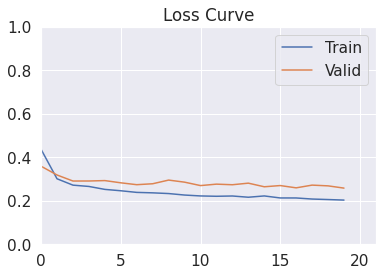

In [0]:
plt.plot(t2_vgg_train_loss,label = 'Train')
plt.plot(t2_vgg_valid_loss,label = 'Valid')
plt.xlim([0,21])
plt.ylim([0,1])
plt.title("Loss Curve")
plt.legend()
plt.show()

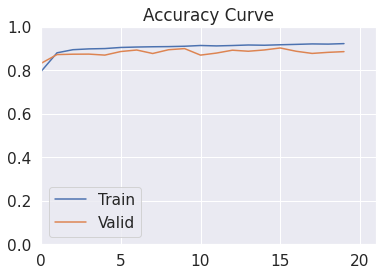

In [0]:
plt.plot(t2_vgg_train_acc,label = 'Train')
plt.plot(t2_vgg_valid_acc,label = 'Valid')
plt.xlim([0,21])
plt.ylim([0,1])
plt.title("Accuracy Curve")
plt.legend()
plt.show()

### Resnet

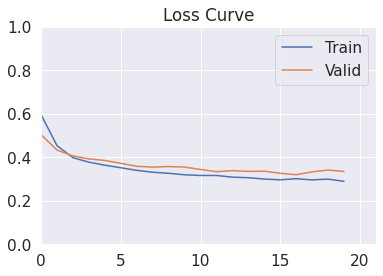

In [0]:
plt.plot(t2_res_train_loss,label = 'Train')
plt.plot(t2_res_valid_loss,label = 'Valid')
plt.xlim([0,21])
plt.ylim([0,1])
plt.title("Loss Curve")
plt.legend()
plt.show()

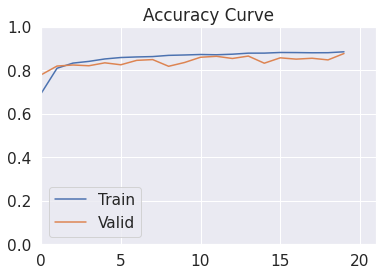

In [0]:
plt.plot(t2_res_train_acc,label = 'Train')
plt.plot(t2_res_valid_acc,label = 'Valid')
plt.xlim([0,21])
plt.ylim([0,1])
plt.title("Accuracy Curve")
plt.legend()
plt.show()

## Accuracy, f1 score and Confusion Matrix

### VGG

0.9229166666666667
0.9357683494201791


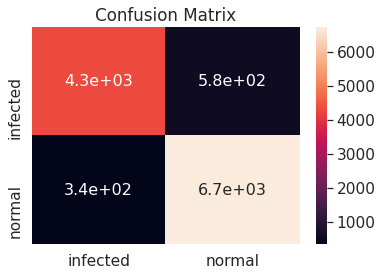

In [0]:
## resnet - Train confusion Matrix
t2_vgg_train_labels,t2_vgg_train_preds = predict(vgg16_freeze_last_conv,trainloader,device)
t2_vgg_train_acc = accuracy_score(t2_vgg_train_labels,t2_vgg_train_preds)
print(t2_vgg_train_acc)
t2_vgg_train_f1 = f1_score(t2_vgg_train_labels,t2_vgg_train_preds)
print(t2_vgg_train_f1)
t2_vgg_train_C = confusion_matrix(t2_vgg_train_labels,t2_vgg_train_preds)
plot_confusion_matrix(t2_vgg_train_C,classes=classes)

0.8886666666666667
0.9068600111544897


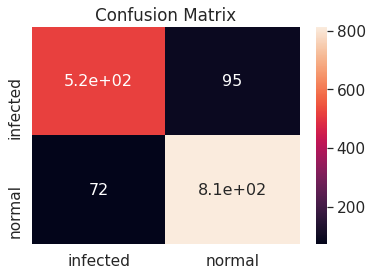

In [0]:
## resnet - valid confusion Matrix
t2_vgg_valid_labels,t2_vgg_valid_preds = predict(vgg16_freeze_last_conv,validloader,device)
t2_vgg_valid_acc = accuracy_score(t2_vgg_valid_labels,t2_vgg_valid_preds)
print(t2_vgg_valid_acc)
t2_vgg_valid_f1 = f1_score(t2_vgg_valid_labels,t2_vgg_valid_preds)
print(t2_vgg_valid_f1)
t2_vgg_valid_C = confusion_matrix(t2_vgg_valid_labels,t2_vgg_valid_preds)
plot_confusion_matrix(t2_vgg_valid_C,classes=classes)

0.9513333333333334
0.9594219010561422


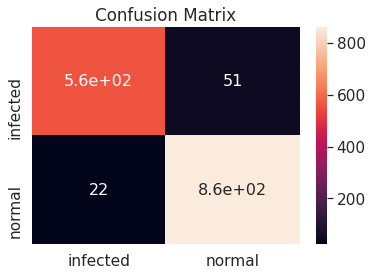

In [0]:
## resnet - test confusion Matrix
t2_vgg_test_labels,t2_vgg_test_preds = predict(vgg16_freeze_last_conv,testloader,device)
t2_vgg_test_acc = accuracy_score(t2_vgg_test_labels,t2_vgg_test_preds)
print(t2_vgg_test_acc)
t2_vgg_test_f1 = f1_score(t2_vgg_test_labels,t2_vgg_test_preds)
print(t2_vgg_test_f1)
t2_vgg_test_C = confusion_matrix(t2_vgg_test_labels,t2_vgg_test_preds)
plot_confusion_matrix(t2_vgg_test_C,classes=classes)

### Resnet

0.9240833333333334
0.9368369964639811


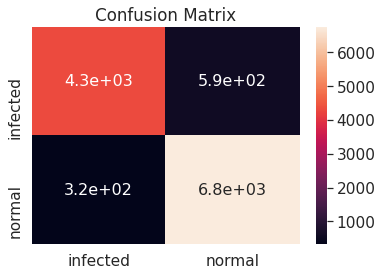

In [0]:
## resnet - Train confusion Matrix
t2_resnet_train_labels,t2_resnet_train_preds = predict(resnet16_freeze_last_conv,trainloader,device)
t2_resnet_train_acc = accuracy_score(t2_resnet_train_labels,t2_resnet_train_preds)
print(t2_resnet_train_acc)
t2_resnet_train_f1 = f1_score(t2_resnet_train_labels,t2_resnet_train_preds)
print(t2_resnet_train_f1)
t2_resnet_train_C = confusion_matrix(t2_resnet_train_labels,t2_resnet_train_preds)
plot_confusion_matrix(t2_resnet_train_C,classes=classes)

0.886
0.9034443817052513


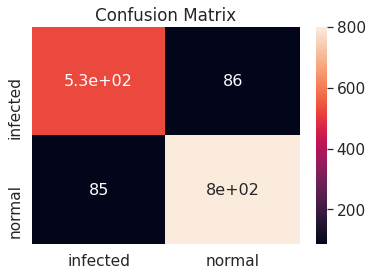

In [0]:
## resnet - valid confusion Matrix
t2_resnet_valid_labels,t2_resnet_valid_preds = predict(resnet16_freeze_last_conv,validloader,device)
t2_resnet_valid_acc = accuracy_score(t2_resnet_valid_labels,t2_resnet_valid_preds)
print(t2_resnet_valid_acc)
t2_resnet_valid_f1 = f1_score(t2_resnet_valid_labels,t2_resnet_valid_preds)
print(t2_resnet_valid_f1)
t2_resnet_valid_C = confusion_matrix(t2_resnet_valid_labels,t2_resnet_valid_preds)
plot_confusion_matrix(t2_resnet_valid_C,classes=classes)

0.9293333333333333
0.9414364640883979


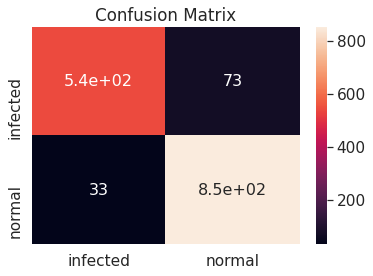

In [0]:
## resnet - test confusion Matrix
t2_resnet_test_labels,t2_resnet_test_preds = predict(resnet18_freeze_last_conv,testloader,device)
t2_resnet_test_acc = accuracy_score(t2_resnet_test_labels,t2_resnet_test_preds)
print(t2_resnet_test_acc)
t2_resnet_test_f1 = f1_score(t2_resnet_test_labels,t2_resnet_test_preds)
print(t2_resnet_test_f1)
t2_resnet_test_C = confusion_matrix(t2_resnet_test_labels,t2_resnet_test_preds)
plot_confusion_matrix(t2_resnet_test_C,classes=classes)

## Best and Worst Predictionns

In [0]:
vgg16_freeze_last_conv = models.vgg16(pretrained=True)
resnet18_freeze_last_conv = models.resnet18(pretrained=True)

In [0]:
vgg16_classifier = nn.Sequential(nn.Linear(25088,190),
                            nn.ReLU(),
                            nn.Dropout(p=0.5),
                            nn.Linear(190,2),
                            )

resnet18_fc = nn.Sequential(nn.Linear(512,190),
                            nn.ReLU(),
                            nn.Dropout(p=0.5),
                            nn.Linear(190,2),
                            )
vgg16_freeze_last_conv.classifier = vgg16_classifier
resnet18_freeze_last_conv.fc = resnet18_fc

In [137]:
vgg16_freeze_last_conv.load_state_dict(torch.load(weights_dir+"vgg16_last_conv.pth"))
resnet18_freeze_last_conv.load_state_dict(torch.load(weights_dir+"res18_last_conv.pth"))

<All keys matched successfully>

### VGG

In [0]:
t2_test_labels,t2_test_probs = predict_prob(vgg16_freeze_last_conv,testloader,device)

In [0]:
t2_best_normal,t2_best_infected = get_best(t2_test_labels,t2_test_probs,testloader)
t2_worst_normal,t2_worst_infected = get_worst(t2_test_labels,t2_test_probs,testloader)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


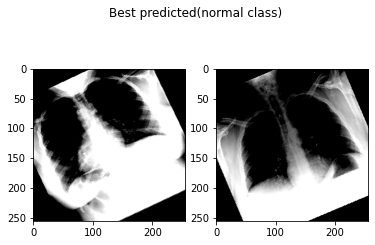

In [140]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(np.moveaxis(t2_best_normal[0],0,-1))

ax2 = fig.add_subplot(122)
ax2.imshow(np.moveaxis(t2_best_normal[1],0,-1))
fig.suptitle("Best predicted(normal class)")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


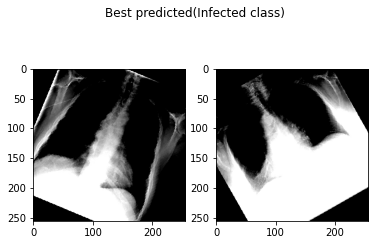

In [141]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(np.moveaxis(t2_best_infected[0],0,-1))

ax2 = fig.add_subplot(122)
ax2.imshow(np.moveaxis(t2_best_infected[1],0,-1))
fig.suptitle("Best predicted(Infected class)")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


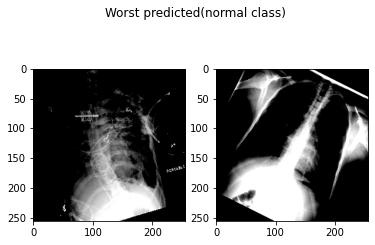

In [142]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(np.moveaxis(t2_worst_normal[0],0,-1))

ax2 = fig.add_subplot(122)
ax2.imshow(np.moveaxis(t2_worst_normal[1],0,-1))
fig.suptitle("Worst predicted(normal class)")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


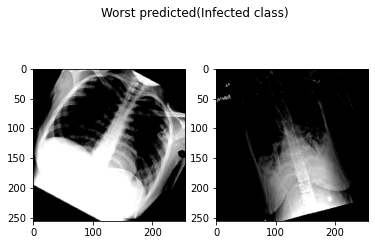

In [143]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(np.moveaxis(t2_worst_infected[0],0,-1))

ax2 = fig.add_subplot(122)
ax2.imshow(np.moveaxis(t2_worst_infected[1],0,-1))
fig.suptitle("Worst predicted(Infected class)")
plt.show()

### ResNet

In [0]:
t2_test_labels,t2_test_probs = predict_prob(resnet18_freeze_last_conv,testloader,device)

In [0]:
t2_best_normal,t2_best_infected = get_best(t2_test_labels,t2_test_probs,testloader)
t2_worst_normal,t2_worst_infected = get_worst(t2_test_labels,t2_test_probs,testloader)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


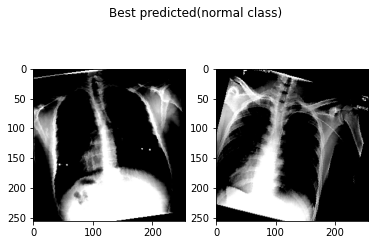

In [146]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(np.moveaxis(t2_best_normal[0],0,-1))

ax2 = fig.add_subplot(122)
ax2.imshow(np.moveaxis(t2_best_normal[1],0,-1))
fig.suptitle("Best predicted(normal class)")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


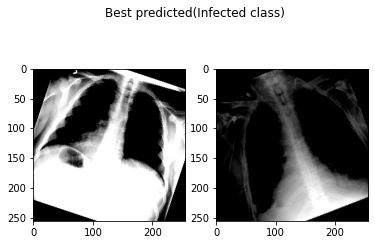

In [147]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(np.moveaxis(t2_best_infected[0],0,-1))

ax2 = fig.add_subplot(122)
ax2.imshow(np.moveaxis(t2_best_infected[1],0,-1))
fig.suptitle("Best predicted(Infected class)")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


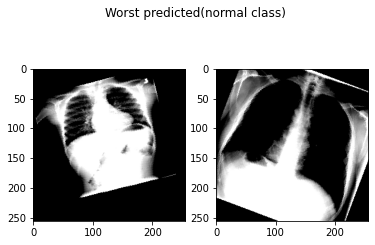

In [148]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(np.moveaxis(t2_worst_normal[0],0,-1))

ax2 = fig.add_subplot(122)
ax2.imshow(np.moveaxis(t2_worst_normal[1],0,-1))
fig.suptitle("Worst predicted(normal class)")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


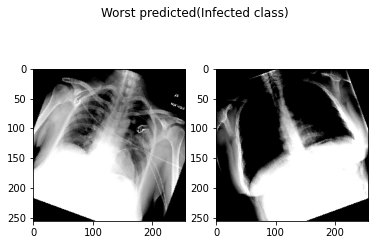

In [149]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(np.moveaxis(t2_worst_infected[0],0,-1))

ax2 = fig.add_subplot(122)
ax2.imshow(np.moveaxis(t2_worst_infected[1],0,-1))
fig.suptitle("Worst predicted(Infected class)")
plt.show()

# Exp#2 Freeze all except last 3 conv layers

In [0]:
vgg16_freeze_last3_conv = models.vgg16(pretrained=True)
resnet18_freeze_last3_conv = models.resnet18(pretrained=True)

In [0]:
# Freeze training for all layers
for param in vgg16_freeze_last3_conv.features.parameters():
    param.requires_grad = False

for i,child in enumerate(resnet18_freeze_last3_conv.children()):
  for param in child.parameters():
    param.requires_grad = False

In [0]:
vgg16_classifier = nn.Sequential(nn.Linear(25088,190),
                            nn.ReLU(),
                            nn.Dropout(p=0.5),
                            nn.Linear(190,2),
                            )

resnet18_fc = nn.Sequential(nn.Linear(512,190),
                            nn.ReLU(),
                            nn.Dropout(p=0.5),
                            nn.Linear(190,2),
                            )
vgg16_freeze_last3_conv.classifier = vgg16_classifier
resnet18_freeze_last3_conv.fc = resnet18_fc

In [0]:
print(resnet18_freeze_last3_conv)

In [0]:
## unfreeze_Freeze last 3 conv layer
vgg_idx = [24,26,28]
for idx in vgg_idx: 
  for param in vgg16_freeze_last3_conv.features[idx].parameters(): 
    param.requires_grad = True

## Freeze resnet layers

for param in resnet18_freeze_last3_conv.layer4[0].downsample[0].parameters(): 
  param.requires_grad = True

for param in resnet18_freeze_last3_conv.layer4[1].conv1.parameters(): 
  param.requires_grad = True

for param in resnet18_freeze_last3_conv.layer4[1].conv2.parameters(): 
  param.requires_grad = True

In [0]:
criterion = nn.CrossEntropyLoss()
vgg_optimizer = optim.SGD(vgg16_freeze_last3_conv.parameters(), lr=0.001, momentum=0.9)
resnet_optimizer = optim.SGD(resnet18_freeze_last3_conv.parameters(), lr=0.001, momentum=0.9)

## Train

In [0]:
## Train both networks
t2_vgg_train_loss, t2_vgg_train_acc, t2_vgg_valid_loss, t2_vgg_valid_acc = train(vgg16_freeze_last3_conv,trainloader,vgg_optimizer,criterion,20,
                                                                                 validloader,weights_dir+"vgg16_last3_conv.pth",batch_info=False,
                                                                                 dot_after_batch=5,asterik_after_batch=10)

t2_res_train_loss, t2_res_train_acc, t2_res_valid_loss, t2_res_valid_acc = train(resnet18_freeze_last3_conv,trainloader,resnet_optimizer,criterion,20,validloader,
                                                                                 weights_dir+"res18_last3_conv.pth",batch_info=False,
                                                                                 dot_after_batch=5,asterik_after_batch=10)


Epoch: 0 train_loss:0.4047   train_acc:0.822   valid_loss:0.3280   valid_acc:0.856 time-taken:2.751m

Epoch: 1 train_loss:0.2715   train_acc:0.896   valid_loss:0.2819   valid_acc:0.873 time-taken:2.757m

Epoch: 2 train_loss:0.2447   train_acc:0.904   valid_loss:0.2727   valid_acc:0.893 time-taken:2.769m

Epoch: 3 train_loss:0.2375   train_acc:0.906   valid_loss:0.2694   valid_acc:0.887 time-taken:2.763m

Epoch: 4 train_loss:0.2220   train_acc:0.913   valid_loss:0.2549   valid_acc:0.894 time-taken:2.769m

Epoch: 5 train_loss:0.2109   train_acc:0.919   valid_loss:0.2667   valid_acc:0.903 time-taken:2.781m

Epoch: 6 train_loss:0.2049   train_acc:0.922   valid_loss:0.2458   valid_acc:0.908 time-taken:2.776m

Epoch: 7 train_loss:0.1998   train_acc:0.922   valid_loss:0.2505   valid_acc:0.892 time-taken:2.762m

Epoch: 8 train_loss:0.1953   train_acc:0.927   valid_loss:0.2454   valid_acc:0.897 time-taken:2.777m

Epoch: 9 train_loss:0.1888   train_acc:0.927   valid_loss:0.2517   valid_acc:0.90

In [0]:
print(t2_vgg_train_loss, t2_vgg_train_acc, t2_vgg_valid_loss, t2_vgg_valid_acc)

[0.4047286853842113, 0.271466172043828, 0.2447384414465531, 0.23748991821987042, 0.22197457435338394, 0.21093226450940836, 0.20489869612282602, 0.19978161814852038, 0.19531407725551855, 0.18880740693513898, 0.1879379180246505, 0.19071936650552612, 0.185960421419662, 0.18320171934538992, 0.1770256507223931, 0.17726579524468686, 0.17413785027852957, 0.17101779212986212, 0.17746060309202774, 0.1709747053142907] [0.8221739130434779, 0.8956521739130435, 0.9037267080745344, 0.9063354037267082, 0.9131469979296064, 0.9193167701863353, 0.9215320910973085, 0.9224016563146996, 0.9265217391304347, 0.9271635610766046, 0.9266666666666665, 0.9269772256728779, 0.9275569358178053, 0.930289855072464, 0.933871635610766, 0.931097308488613, 0.9336438923395448, 0.9340579710144926, 0.9322360248447203, 0.9357763975155275] [tensor(0.3280, device='cuda:0'), tensor(0.2819, device='cuda:0'), tensor(0.2727, device='cuda:0'), tensor(0.2694, device='cuda:0'), tensor(0.2549, device='cuda:0'), tensor(0.2667, device='c

In [0]:
print(t2_res_train_loss, t2_res_train_acc, t2_res_valid_loss, t2_res_valid_acc)

[0.5701075602268827, 0.4127306100251018, 0.3667079352814218, 0.3374481838250506, 0.32232321518054907, 0.30419715504715406, 0.29127283739870874, 0.2812676112289014, 0.27374525411405426, 0.26484754465628363, 0.2639304693194403, 0.2547711632821871, 0.246327413165051, 0.2516442973544632, 0.25056273306625476, 0.2419629656318305, 0.2424833694661873, 0.2351790441982988, 0.23412620027860007, 0.2294245621432429] [0.7081987577639751, 0.827577639751553, 0.8472877846790892, 0.8619461697722569, 0.8714906832298136, 0.8807039337474123, 0.8840579710144926, 0.8877846790890267, 0.8948654244306418, 0.8972877846790889, 0.8954244306418222, 0.8994616977225672, 0.9046376811594202, 0.9018219461697722, 0.9031055900621118, 0.9051138716356107, 0.909296066252588, 0.9064182194616978, 0.9089233954451347, 0.9127950310559008] [tensor(0.4700, device='cuda:0'), tensor(0.3894, device='cuda:0'), tensor(0.3752, device='cuda:0'), tensor(0.3523, device='cuda:0'), tensor(0.3357, device='cuda:0'), tensor(0.3189, device='cuda:

## Loss and Accuracy plots

### VGG

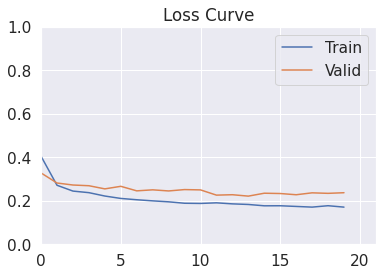

In [0]:
plt.plot(t2_vgg_train_loss,label = 'Train')
plt.plot(t2_vgg_valid_loss,label = 'Valid')
plt.xlim([0,21])
plt.ylim([0,1])
plt.title("Loss Curve")
plt.legend()
plt.show()

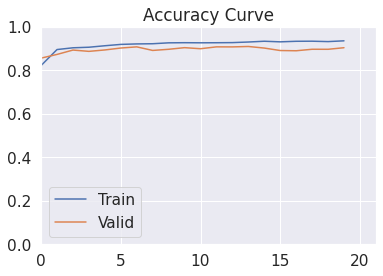

In [0]:
plt.plot(t2_vgg_train_acc,label = 'Train')
plt.plot(t2_vgg_valid_acc,label = 'Valid')
plt.xlim([0,21])
plt.ylim([0,1])
plt.title("Accuracy Curve")
plt.legend()
plt.show()

### Resnet

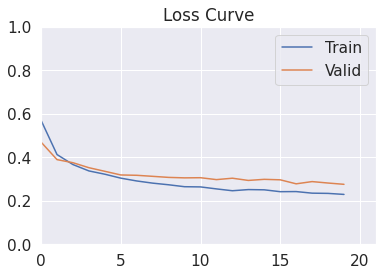

In [0]:
plt.plot(t2_res_train_loss,label = 'Train')
plt.plot(t2_res_valid_loss,label = 'Valid')
plt.xlim([0,21])
plt.ylim([0,1])
plt.title("Loss Curve")
plt.legend()
plt.show()

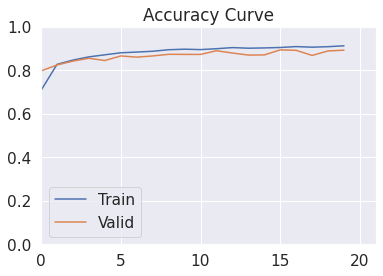

In [0]:
plt.plot(t2_res_train_acc,label = 'Train')
plt.plot(t2_res_valid_acc,label = 'Valid')
plt.xlim([0,21])
plt.ylim([0,1])
plt.title("Accuracy Curve")
plt.legend()
plt.show()

## Accuracy, f1 score and Confusion Matrix

### VGG

0.9391666666666667
0.9495298672566371


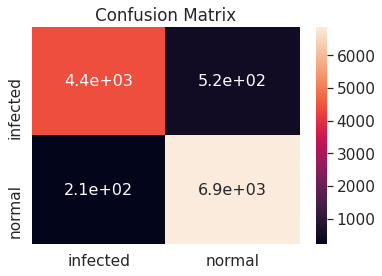

In [0]:
## resnet - Train confusion Matrix
t2_vgg_train_labels,t2_vgg_train_preds = predict(vgg16_freeze_last3_conv,trainloader,device)
t2_vgg_train_acc = accuracy_score(t2_vgg_train_labels,t2_vgg_train_preds)
print(t2_vgg_train_acc)
t2_vgg_train_f1 = f1_score(t2_vgg_train_labels,t2_vgg_train_preds)
print(t2_vgg_train_f1)
t2_vgg_train_C = confusion_matrix(t2_vgg_train_labels,t2_vgg_train_preds)
plot_confusion_matrix(t2_vgg_train_C,classes=classes)

0.902
0.9181058495821727


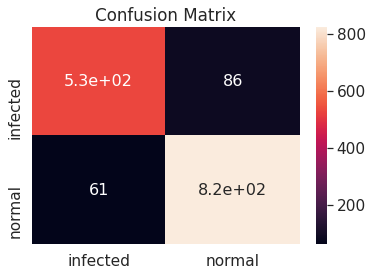

In [0]:
## resnet - valid confusion Matrix
t2_vgg_valid_labels,t2_vgg_valid_preds = predict(vgg16_freeze_last3_conv,validloader,device)
t2_vgg_valid_acc = accuracy_score(t2_vgg_valid_labels,t2_vgg_valid_preds)
print(t2_vgg_valid_acc)
t2_vgg_valid_f1 = f1_score(t2_vgg_valid_labels,t2_vgg_valid_preds)
print(t2_vgg_valid_f1)
t2_vgg_valid_C = confusion_matrix(t2_vgg_valid_labels,t2_vgg_valid_preds)
plot_confusion_matrix(t2_vgg_valid_C,classes=classes)

0.9653333333333334
0.9711111111111111


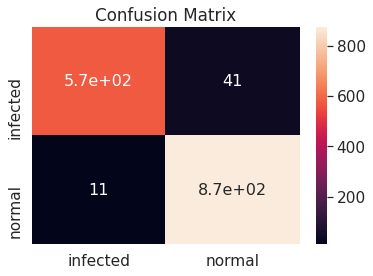

In [0]:
## resnet - test confusion Matrix
t2_vgg_test_labels,t2_vgg_test_preds = predict(vgg16_freeze_last3_conv,testloader,device)
t2_vgg_test_acc = accuracy_score(t2_vgg_test_labels,t2_vgg_test_preds)
print(t2_vgg_test_acc)
t2_vgg_test_f1 = f1_score(t2_vgg_test_labels,t2_vgg_test_preds)
print(t2_vgg_test_f1)
t2_vgg_test_C = confusion_matrix(t2_vgg_test_labels,t2_vgg_test_preds)
plot_confusion_matrix(t2_vgg_test_C,classes=classes)

### Resnet

0.9154166666666667
0.9295089936801167


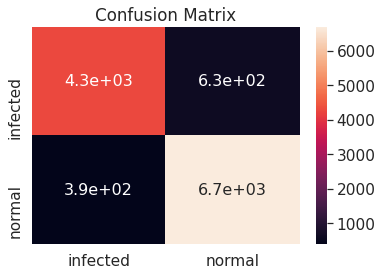

In [0]:
## resnet - Train confusion Matrix
t2_resnet_train_labels,t2_resnet_train_preds = predict(resnet18_freeze_last3_conv,trainloader,device)
t2_resnet_train_acc = accuracy_score(t2_resnet_train_labels,t2_resnet_train_preds)
print(t2_resnet_train_acc)
t2_resnet_train_f1 = f1_score(t2_resnet_train_labels,t2_resnet_train_preds)
print(t2_resnet_train_f1)
t2_resnet_train_C = confusion_matrix(t2_resnet_train_labels,t2_resnet_train_preds)
plot_confusion_matrix(t2_resnet_train_C,classes=classes)

0.8873333333333333
0.9053221288515406


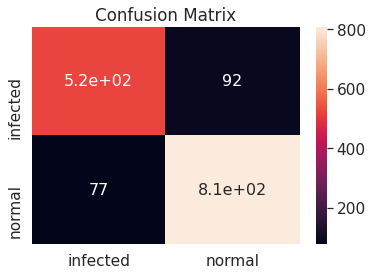

In [0]:
## resnet - valid confusion Matrix
t2_resnet_valid_labels,t2_resnet_valid_preds = predict(resnet18_freeze_last3_conv,validloader,device)
t2_resnet_valid_acc = accuracy_score(t2_resnet_valid_labels,t2_resnet_valid_preds)
print(t2_resnet_valid_acc)
t2_resnet_valid_f1 = f1_score(t2_resnet_valid_labels,t2_resnet_valid_preds)
print(t2_resnet_valid_f1)
t2_resnet_valid_C = confusion_matrix(t2_resnet_valid_labels,t2_resnet_valid_preds)
plot_confusion_matrix(t2_resnet_valid_C,classes=classes)

0.9486666666666667
0.9574820541137493


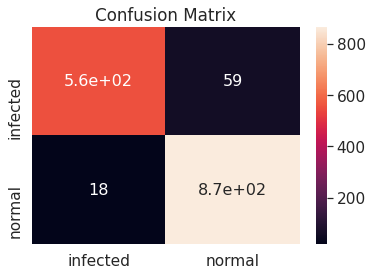

In [0]:
## resnet - test confusion Matrix
t2_resnet_test_labels,t2_resnet_test_preds = predict(resnet18_freeze_last3_conv,testloader,device)
t2_resnet_test_acc = accuracy_score(t2_resnet_test_labels,t2_resnet_test_preds)
print(t2_resnet_test_acc)
t2_resnet_test_f1 = f1_score(t2_resnet_test_labels,t2_resnet_test_preds)
print(t2_resnet_test_f1)
t2_resnet_test_C = confusion_matrix(t2_resnet_test_labels,t2_resnet_test_preds)
plot_confusion_matrix(t2_resnet_test_C,classes=classes)

## Best and Worst Predictionns

In [0]:
vgg16_freeze_last3_conv = models.vgg16(pretrained=True)
resnet18_freeze_last3_conv = models.resnet18(pretrained=True)

In [0]:
vgg16_classifier = nn.Sequential(nn.Linear(25088,190),
                            nn.ReLU(),
                            nn.Dropout(p=0.5),
                            nn.Linear(190,2),
                            )

resnet18_fc = nn.Sequential(nn.Linear(512,190),
                            nn.ReLU(),
                            nn.Dropout(p=0.5),
                            nn.Linear(190,2),
                            )
vgg16_freeze_last3_conv.classifier = vgg16_classifier
resnet18_freeze_last3_conv.fc = resnet18_fc

In [122]:
vgg16_freeze_last3_conv.load_state_dict(torch.load(weights_dir+"vgg16_last3_conv.pth"))
resnet18_freeze_last3_conv.load_state_dict(torch.load(weights_dir+"res18_last3_conv.pth"))

<All keys matched successfully>

### VGG

In [0]:
t2_test_labels,t2_test_probs = predict_prob(vgg16_freeze_last3_conv,testloader,device)

In [0]:
t2_best_normal,t2_best_infected = get_best(t2_test_labels,t2_test_probs,testloader)
t2_worst_normal,t2_worst_infected = get_worst(t2_test_labels,t2_test_probs,testloader)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


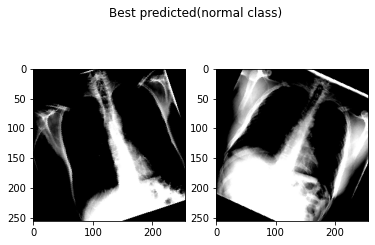

In [125]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(np.moveaxis(t2_best_normal[0],0,-1))

ax2 = fig.add_subplot(122)
ax2.imshow(np.moveaxis(t2_best_normal[1],0,-1))
fig.suptitle("Best predicted(normal class)")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


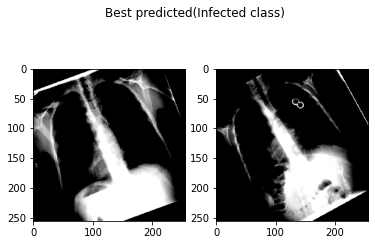

In [126]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(np.moveaxis(t2_best_infected[0],0,-1))

ax2 = fig.add_subplot(122)
ax2.imshow(np.moveaxis(t2_best_infected[1],0,-1))
fig.suptitle("Best predicted(Infected class)")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


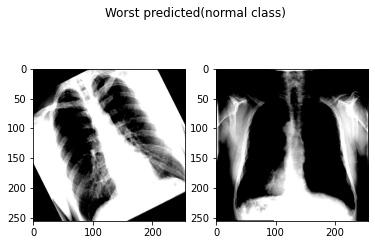

In [127]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(np.moveaxis(t2_worst_normal[0],0,-1))

ax2 = fig.add_subplot(122)
ax2.imshow(np.moveaxis(t2_worst_normal[1],0,-1))
fig.suptitle("Worst predicted(normal class)")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


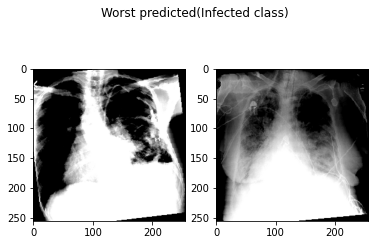

In [128]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(np.moveaxis(t2_worst_infected[0],0,-1))

ax2 = fig.add_subplot(122)
ax2.imshow(np.moveaxis(t2_worst_infected[1],0,-1))
fig.suptitle("Worst predicted(Infected class)")
plt.show()

### ResNet

In [0]:
t2_test_labels,t2_test_probs = predict_prob(resnet18_freeze_last3_conv,testloader,device)

In [0]:
t2_best_normal,t2_best_infected = get_best(t2_test_labels,t2_test_probs,testloader)
t2_worst_normal,t2_worst_infected = get_worst(t2_test_labels,t2_test_probs,testloader)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


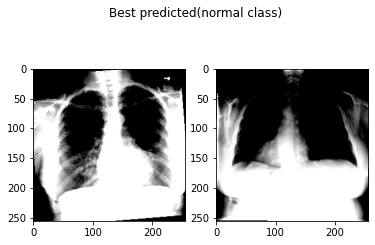

In [131]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(np.moveaxis(t2_best_normal[0],0,-1))

ax2 = fig.add_subplot(122)
ax2.imshow(np.moveaxis(t2_best_normal[1],0,-1))
fig.suptitle("Best predicted(normal class)")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


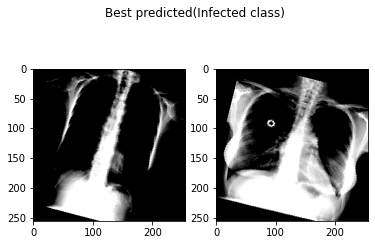

In [132]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(np.moveaxis(t2_best_infected[0],0,-1))

ax2 = fig.add_subplot(122)
ax2.imshow(np.moveaxis(t2_best_infected[1],0,-1))
fig.suptitle("Best predicted(Infected class)")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


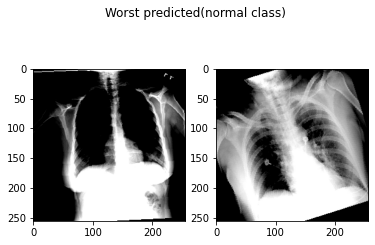

In [133]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(np.moveaxis(t2_worst_normal[0],0,-1))

ax2 = fig.add_subplot(122)
ax2.imshow(np.moveaxis(t2_worst_normal[1],0,-1))
fig.suptitle("Worst predicted(normal class)")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


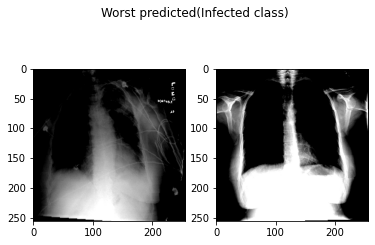

In [134]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(np.moveaxis(t2_worst_infected[0],0,-1))

ax2 = fig.add_subplot(122)
ax2.imshow(np.moveaxis(t2_worst_infected[1],0,-1))
fig.suptitle("Worst predicted(Infected class)")
plt.show()

# Exp#3 Fine tune all the network

In [0]:
vgg16_all = models.vgg16(pretrained=True)
resnet18_all = models.resnet18(pretrained=True)

In [0]:
vgg16_classifier = nn.Sequential(nn.Linear(25088,190),
                            nn.ReLU(),
                            nn.Dropout(p=0.5),
                            nn.Linear(190,2),
                            )

resnet18_fc = nn.Sequential(nn.Linear(512,190),
                            nn.ReLU(),
                            nn.Dropout(p=0.5),
                            nn.Linear(190,2),
                            )
vgg16_all.classifier = vgg16_classifier
resnet18_all.fc = resnet18_fc

In [0]:
criterion = nn.CrossEntropyLoss()
vgg_optimizer = optim.SGD(vgg16_all.parameters(), lr=0.001, momentum=0.9)
resnet_optimizer = optim.SGD(resnet18_all.parameters(), lr=0.001, momentum=0.9)

## Train

In [0]:
## Train both networks
t2_vgg_train_loss, t2_vgg_train_acc, t2_vgg_valid_loss, t2_vgg_valid_acc = train(vgg16_all,trainloader,vgg_optimizer,criterion,20,
                                                                                 validloader,weights_dir+"vgg16_entire.pth",batch_info=False,
                                                                                 dot_after_batch=5,asterik_after_batch=10)

t2_res_train_loss, t2_res_train_acc, t2_res_valid_loss, t2_res_valid_acc = train(resnet18_all,trainloader,resnet_optimizer,criterion,20,validloader,
                                                                                 weights_dir+"res18_entire.pth",batch_info=False,
                                                                                 dot_after_batch=5,asterik_after_batch=10)


Epoch: 0 train_loss:0.3490   train_acc:0.847   valid_loss:0.2716   valid_acc:0.895 time-taken:2.940m

Epoch: 1 train_loss:0.2254   train_acc:0.915   valid_loss:0.2483   valid_acc:0.897 time-taken:2.885m

Epoch: 2 train_loss:0.2002   train_acc:0.926   valid_loss:0.2434   valid_acc:0.905 time-taken:2.902m

Epoch: 3 train_loss:0.1891   train_acc:0.929   valid_loss:0.2301   valid_acc:0.901 time-taken:2.871m

Epoch: 4 train_loss:0.1810   train_acc:0.932   valid_loss:0.2275   valid_acc:0.896 time-taken:2.850m

Epoch: 5 train_loss:0.1680   train_acc:0.938   valid_loss:0.2144   valid_acc:0.917 time-taken:3.059m

Epoch: 6 train_loss:0.1687   train_acc:0.937   valid_loss:0.2112   valid_acc:0.918 time-taken:2.891m

Epoch: 7 train_loss:0.1618   train_acc:0.939   valid_loss:0.2096   valid_acc:0.918 time-taken:2.904m

Epoch: 8 train_loss:0.1513   train_acc:0.946   valid_loss:0.2211   valid_acc:0.914 time-taken:2.862m

Epoch: 9 train_loss:0.1515   train_acc:0.945   valid_loss:0.2105   valid_acc:0.92

In [0]:
print(t2_vgg_train_loss, t2_vgg_train_acc, t2_vgg_valid_loss, t2_vgg_valid_acc)

[0.3490348897874355, 0.22543403543531895, 0.20022044606506825, 0.1890586779266596, 0.18096901841461657, 0.16798980087041854, 0.16874949201941492, 0.16175660081207752, 0.15125607512891293, 0.15149133250117303, 0.14850917756557463, 0.14608391743153334, 0.1395084385946393, 0.13715556070208548, 0.13593450739979743, 0.12803238593041896, 0.12535203689709307, 0.13089478693902493, 0.12397376291453838, 0.1156090029515326] [0.8468333333333331, 0.9154166666666665, 0.9257500000000001, 0.9289166666666666, 0.9324166666666666, 0.9384999999999999, 0.9374166666666666, 0.938916666666667, 0.9460833333333337, 0.9445, 0.9452500000000008, 0.9488333333333335, 0.9495000000000001, 0.9495000000000001, 0.9496666666666672, 0.9544166666666669, 0.9538333333333336, 0.9518333333333335, 0.9545000000000001, 0.9567500000000002] [tensor(0.2716, device='cuda:0'), tensor(0.2483, device='cuda:0'), tensor(0.2434, device='cuda:0'), tensor(0.2301, device='cuda:0'), tensor(0.2275, device='cuda:0'), tensor(0.2144, device='cuda:0

In [0]:
print(t2_res_train_loss, t2_res_train_acc, t2_res_valid_loss, t2_res_valid_acc)

[0.4626969373226166, 0.269903247654438, 0.23440975308418274, 0.2149462663382292, 0.20205561995506285, 0.19119265526533127, 0.18225845724344253, 0.1756222327426076, 0.1753658428043127, 0.16677260607481004, 0.16403463594615458, 0.16233012907207012, 0.15661893405020236, 0.1563816600292921, 0.15543036215007305, 0.1498522236943245, 0.1485848134756088, 0.1448815981671214, 0.13835396192967891, 0.13991174422204494] [0.7839166666666668, 0.8947499999999997, 0.9079999999999999, 0.9187499999999998, 0.9239166666666659, 0.9281666666666668, 0.9322500000000002, 0.933333333333333, 0.9352500000000002, 0.9365833333333334, 0.93825, 0.9400833333333337, 0.9435833333333334, 0.9424166666666666, 0.9435833333333334, 0.9449999999999997, 0.9452499999999999, 0.948416666666667, 0.948, 0.9485833333333334] [tensor(0.3427, device='cuda:0'), tensor(0.2809, device='cuda:0'), tensor(0.2749, device='cuda:0'), tensor(0.2475, device='cuda:0'), tensor(0.2459, device='cuda:0'), tensor(0.2521, device='cuda:0'), tensor(0.2421, 

## Loss and Accuracy plots

### VGG

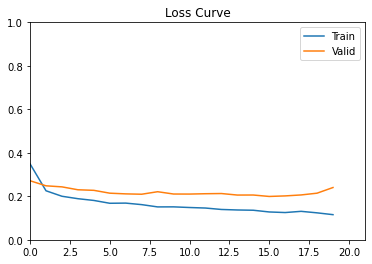

In [0]:
plt.plot(t2_vgg_train_loss,label = 'Train')
plt.plot(t2_vgg_valid_loss,label = 'Valid')
plt.xlim([0,21])
plt.ylim([0,1])
plt.title("Loss Curve")
plt.legend()
plt.show()

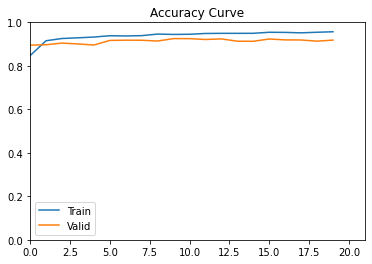

In [0]:
plt.plot(t2_vgg_train_acc,label = 'Train')
plt.plot(t2_vgg_valid_acc,label = 'Valid')
plt.xlim([0,21])
plt.ylim([0,1])
plt.title("Accuracy Curve")
plt.legend()
plt.show()

### Resnet

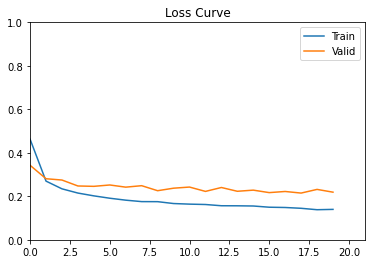

In [0]:
plt.plot(t2_res_train_loss,label = 'Train')
plt.plot(t2_res_valid_loss,label = 'Valid')
plt.xlim([0,21])
plt.ylim([0,1])
plt.title("Loss Curve")
plt.legend()
plt.show()

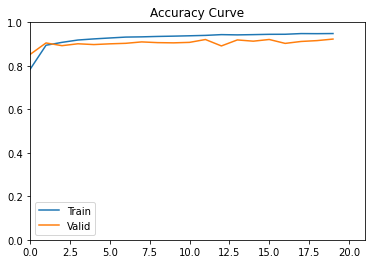

In [0]:
plt.plot(t2_res_train_acc,label = 'Train')
plt.plot(t2_res_valid_acc,label = 'Valid')
plt.xlim([0,21])
plt.ylim([0,1])
plt.title("Accuracy Curve")
plt.legend()
plt.show()

## Accuracy, f1 score and Confusion Matrix

### VGG

0.9530833333333333
0.9599658678802531


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


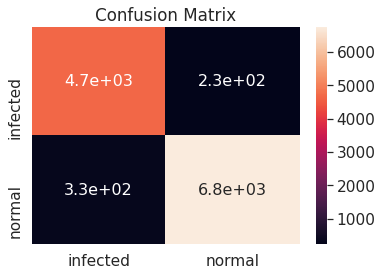

In [0]:
## resnet - Train confusion Matrix
t2_vgg_train_labels,t2_vgg_train_preds = predict(vgg16_all,trainloader,device)
t2_vgg_train_acc = accuracy_score(t2_vgg_train_labels,t2_vgg_train_preds)
print(t2_vgg_train_acc)
t2_vgg_train_f1 = f1_score(t2_vgg_train_labels,t2_vgg_train_preds)
print(t2_vgg_train_f1)
t2_vgg_train_C = confusion_matrix(t2_vgg_train_labels,t2_vgg_train_preds)
plot_confusion_matrix(t2_vgg_train_C,classes=classes)

0.916
0.9270833333333334


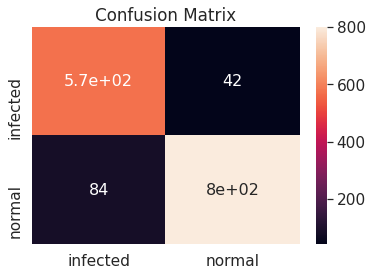

In [0]:
## resnet - valid confusion Matrix
t2_vgg_valid_labels,t2_vgg_valid_preds = predict(vgg16_all,validloader,device)
t2_vgg_valid_acc = accuracy_score(t2_vgg_valid_labels,t2_vgg_valid_preds)
print(t2_vgg_valid_acc)
t2_vgg_valid_f1 = f1_score(t2_vgg_valid_labels,t2_vgg_valid_preds)
print(t2_vgg_valid_f1)
t2_vgg_valid_C = confusion_matrix(t2_vgg_valid_labels,t2_vgg_valid_preds)
plot_confusion_matrix(t2_vgg_valid_C,classes=classes)

0.9726666666666667
0.9767705382436261


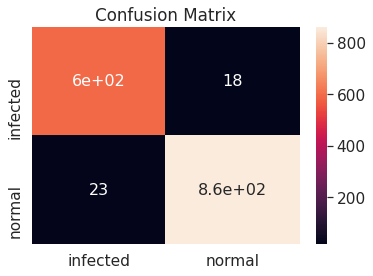

In [0]:
## resnet - test confusion Matrix
t2_vgg_test_labels,t2_vgg_test_preds = predict(vgg16_all,testloader,device)
t2_vgg_test_acc = accuracy_score(t2_vgg_test_labels,t2_vgg_test_preds)
print(t2_vgg_test_acc)
t2_vgg_test_f1 = f1_score(t2_vgg_test_labels,t2_vgg_test_preds)
print(t2_vgg_test_f1)
t2_vgg_test_C = confusion_matrix(t2_vgg_test_labels,t2_vgg_test_preds)
plot_confusion_matrix(t2_vgg_test_C,classes=classes)

### Resnet

0.9518333333333333
0.9595521343596921


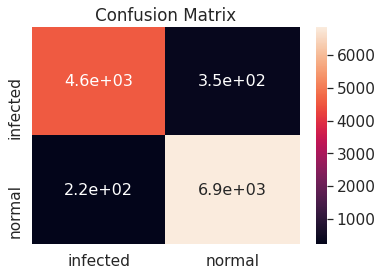

In [0]:
## resnet - Train confusion Matrix
t2_resnet_train_labels,t2_resnet_train_preds = predict(resnet18_all,trainloader,device)
t2_resnet_train_acc = accuracy_score(t2_resnet_train_labels,t2_resnet_train_preds)
print(t2_resnet_train_acc)
t2_resnet_train_f1 = f1_score(t2_resnet_train_labels,t2_resnet_train_preds)
print(t2_resnet_train_f1)
t2_resnet_train_C = confusion_matrix(t2_resnet_train_labels,t2_resnet_train_preds)
plot_confusion_matrix(t2_resnet_train_C,classes=classes)

0.91
0.9238578680203045


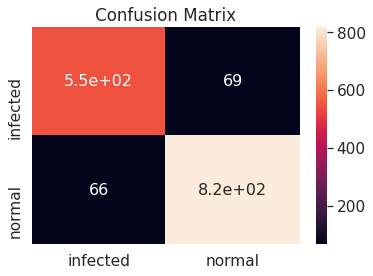

In [0]:
## resnet - valid confusion Matrix
t2_resnet_valid_labels,t2_resnet_valid_preds = predict(resnet18_all,validloader,device)
t2_resnet_valid_acc = accuracy_score(t2_resnet_valid_labels,t2_resnet_valid_preds)
print(t2_resnet_valid_acc)
t2_resnet_valid_f1 = f1_score(t2_resnet_valid_labels,t2_resnet_valid_preds)
print(t2_resnet_valid_f1)
t2_resnet_valid_C = confusion_matrix(t2_resnet_valid_labels,t2_resnet_valid_preds)
plot_confusion_matrix(t2_resnet_valid_C,classes=classes)

0.9626666666666667
0.9686800894854587


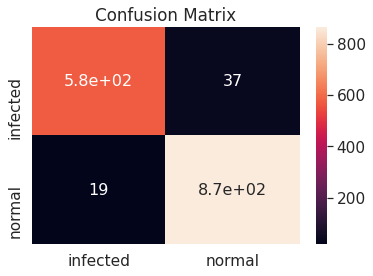

In [0]:
## resnet - test confusion Matrix
t2_resnet_test_labels,t2_resnet_test_preds = predict(resnet18_all,testloader,device)
t2_resnet_test_acc = accuracy_score(t2_resnet_test_labels,t2_resnet_test_preds)
print(t2_resnet_test_acc)
t2_resnet_test_f1 = f1_score(t2_resnet_test_labels,t2_resnet_test_preds)
print(t2_resnet_test_f1)
t2_resnet_test_C = confusion_matrix(t2_resnet_test_labels,t2_resnet_test_preds)
plot_confusion_matrix(t2_resnet_test_C,classes=classes)

## Best and Worst Predictionns

In [4]:
vgg16_all = models.vgg16(pretrained=True)
resnet18_all = models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth


Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


In [0]:
vgg16_classifier = nn.Sequential(nn.Linear(25088,190),
                            nn.ReLU(),
                            nn.Dropout(p=0.5),
                            nn.Linear(190,2),
                            )

resnet18_fc = nn.Sequential(nn.Linear(512,190),
                            nn.ReLU(),
                            nn.Dropout(p=0.5),
                            nn.Linear(190,2),
                            )
vgg16_all.classifier = vgg16_classifier
resnet18_all.fc = resnet18_fc

In [9]:
vgg16_all.load_state_dict(torch.load(weights_dir+"vgg16_entire.pth"))
resnet18_all.load_state_dict(torch.load(weights_dir+"res18_entire.pth"))

<All keys matched successfully>

### VGG

In [0]:
t2_test_labels,t2_test_probs = predict_prob(vgg16_all,testloader,device)

In [0]:
t2_best_normal,t2_best_infected = get_best(t2_test_labels,t2_test_probs,testloader)
t2_worst_normal,t2_worst_infected = get_worst(t2_test_labels,t2_test_probs,testloader)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


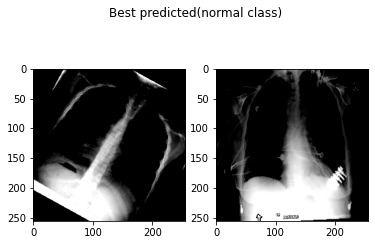

In [98]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(np.moveaxis(t2_best_normal[0],0,-1))

ax2 = fig.add_subplot(122)
ax2.imshow(np.moveaxis(t2_best_normal[1],0,-1))
fig.suptitle("Best predicted(normal class)")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


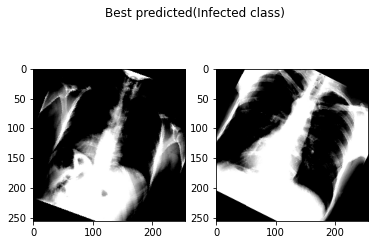

In [99]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(np.moveaxis(t2_best_infected[0],0,-1))

ax2 = fig.add_subplot(122)
ax2.imshow(np.moveaxis(t2_best_infected[1],0,-1))
fig.suptitle("Best predicted(Infected class)")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


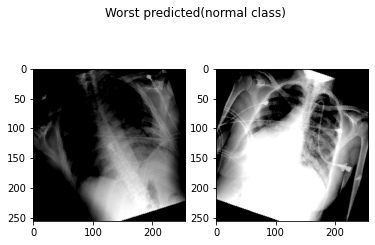

In [100]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(np.moveaxis(t2_worst_normal[0],0,-1))

ax2 = fig.add_subplot(122)
ax2.imshow(np.moveaxis(t2_worst_normal[1],0,-1))
fig.suptitle("Worst predicted(normal class)")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


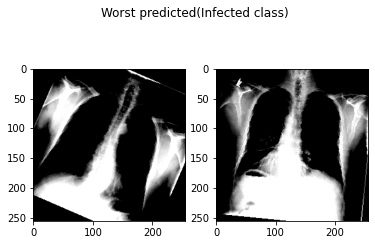

In [101]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(np.moveaxis(t2_worst_infected[0],0,-1))

ax2 = fig.add_subplot(122)
ax2.imshow(np.moveaxis(t2_worst_infected[1],0,-1))
fig.suptitle("Worst predicted(Infected class)")
plt.show()

### ResNet

In [0]:
t2_test_labels,t2_test_probs = predict_prob(resnet18_all,testloader,device)

In [0]:
t2_best_normal,t2_best_infected = get_best(t2_test_labels,t2_test_probs,testloader)
t2_worst_normal,t2_worst_infected = get_worst(t2_test_labels,t2_test_probs,testloader)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


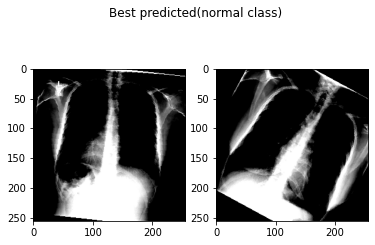

In [114]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(np.moveaxis(t2_best_normal[0],0,-1))

ax2 = fig.add_subplot(122)
ax2.imshow(np.moveaxis(t2_best_normal[1],0,-1))
fig.suptitle("Best predicted(normal class)")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


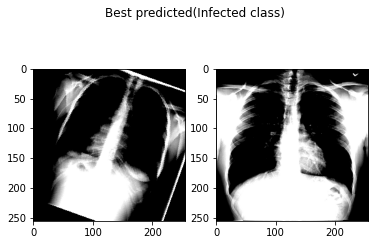

In [117]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(np.moveaxis(t2_best_infected[0],0,-1))

ax2 = fig.add_subplot(122)
ax2.imshow(np.moveaxis(t2_best_infected[1],0,-1))
fig.suptitle("Best predicted(Infected class)")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


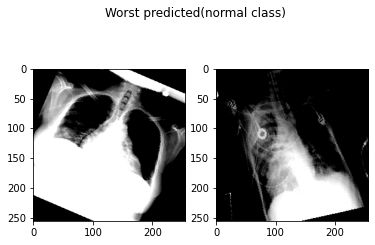

In [118]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(np.moveaxis(t2_worst_normal[0],0,-1))

ax2 = fig.add_subplot(122)
ax2.imshow(np.moveaxis(t2_worst_normal[1],0,-1))
fig.suptitle("Worst predicted(normal class)")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


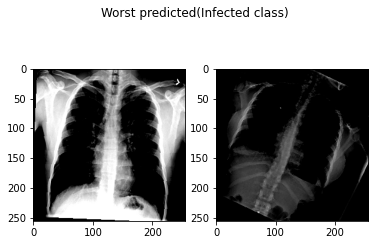

In [119]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(np.moveaxis(t2_worst_infected[0],0,-1))

ax2 = fig.add_subplot(122)
ax2.imshow(np.moveaxis(t2_worst_infected[1],0,-1))
fig.suptitle("Worst predicted(Infected class)")
plt.show()